<h1>Árboles de regresión<h1>

In [209]:
#importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<p>Primero leemos el archivo csv con el que se estara trabajando y mostramos los primeros 5 datos para observar las variables</p>

In [210]:
dfTrain = pd.read_csv("housing_train.csv")
dfTrain.shape
dfTrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<p>Mostramos la informacion de cada variable para seleccionar los valores que son de interes para la practica</p>

<p>Se seleccionan las variables y se realiza un muestro para ver posibles valores nulos</p>

In [211]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<p>Se realiza una correlacion con la variable de interes para elegir las variables que mas influiran en el precio</p>

In [212]:
corrTrain = dfTrain.corr()
print(corrTrain['SalePrice'].sort_values(ascending=False)[:8],'\n')

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
FullBath       0.560664
Name: SalePrice, dtype: float64 



In [213]:
dfFilter1 = dfTrain[["GarageCars","LotArea","TotRmsAbvGrd","TotalBsmtSF","GrLivArea","OverallQual","GarageYrBlt","SalePrice"]]
dfFilter1.isnull().sum()

GarageCars       0
LotArea          0
TotRmsAbvGrd     0
TotalBsmtSF      0
GrLivArea        0
OverallQual      0
GarageYrBlt     81
SalePrice        0
dtype: int64

<p>Como se observa la unica variable con valores nulos es el garage, por lo tanto se realiza un reemplazo de esos datos a un valo 0, se intuye que las viviendas con valores nulos es por que no cuentan con un garage</p>

In [214]:
dfFilter1["GarageYrBlt"].fillna(0,inplace=True)

C:\Users\jcarl\AppData\Local\Temp\ipykernel_23972\2510695097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFilter1["GarageYrBlt"].fillna(0,inplace=True)


In [215]:
dfFilter1.isnull().sum()

GarageCars      0
LotArea         0
TotRmsAbvGrd    0
TotalBsmtSF     0
GrLivArea       0
OverallQual     0
GarageYrBlt     0
SalePrice       0
dtype: int64

<p>Se crea una matriz de correlacion de los datos</p>

In [216]:
dfFilter1.corr()

,GarageCars,LotArea,TotRmsAbvGrd,TotalBsmtSF,GrLivArea,OverallQual,GarageYrBlt,SalePrice
GarageCars,1.000000,0.154871,0.362289,0.434585,0.467247,0.600671,0.598005,0.640409
LotArea,0.154871,1.000000,0.190015,0.260833,0.263116,0.105806,0.072599,0.263843
TotRmsAbvGrd,0.362289,0.190015,1.000000,0.285573,0.825489,0.427452,0.095607,0.533723
TotalBsmtSF,0.434585,0.260833,0.285573,1.000000,0.454868,0.537808,0.176359,0.613581
GrLivArea,0.467247,0.263116,0.825489,0.454868,1.000000,0.593007,0.162543,0.708624
OverallQual,0.600671,0.105806,0.427452,0.537808,0.593007,1.000000,0.288998,0.790982
GarageYrBlt,0.598005,0.072599,0.095607,0.176359,0.162543,0.288998,1.000000,0.261366
SalePrice,0.640409,0.263843,0.533723,0.613581,0.708624,0.790982,0.261366,1.000000


<p>se realiza nuevamente una matriz de correlación para ver mas a detalle las variables que estan mas correlacionadas con nuestro objetivo, que en este caso es el precio de la vivienda</p>

<AxesSubplot:>

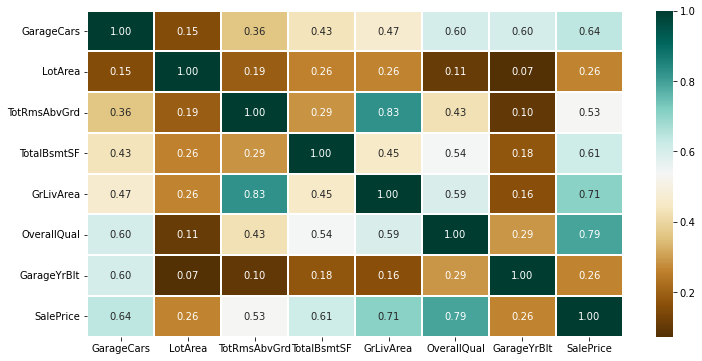

In [217]:
#MC = dfFilter1.corr()
#sns.heatmap(data=MC,annot=True)
plt.figure(figsize=(12, 6))
sns.heatmap(dfFilter1.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<p>Para crear nuestro arbol de decisión de regresión, se separa el set de datos en 2, dejaremos la parte de 
la variable objetivo que es el precio en eje Y y el resto de variables en el eje X</p>

In [218]:
X = dfFilter1.iloc[:, :-1]
y = dfFilter1.iloc[:, -1]
X

,GarageCars,LotArea,TotRmsAbvGrd,TotalBsmtSF,GrLivArea,OverallQual,GarageYrBlt
0,2,8450,8,856,1710,7,2003.0
1,2,9600,6,1262,1262,6,1976.0
2,2,11250,6,920,1786,7,2001.0
3,3,9550,7,756,1717,7,1998.0
4,3,14260,9,1145,2198,8,2000.0
...,...,...,...,...,...,...,...
1455,2,7917,7,953,1647,6,1999.0
1456,2,13175,7,1542,2073,6,1978.0
1457,1,9042,9,1152,2340,7,1941.0
1458,1,9717,5,1078,1078,5,1950.0


In [219]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

<p>Para crear nuestro modelo se debera importar una nueva libreria para separar los conjuntos de informacion
en sets de entrenamiento y sets de prueba</p>

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=0)

<p>Posteriormente se importa una nueva libreria para realizar el arbol de regresión, se le indica la profundidad
que tendra el arbol y se pasan los sets de entrenamiento creados anteriormente y se muestra la representacion del arbol</p>

In [221]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=4,criterion='squared_error')
modelo = tree.fit(X_train,y_train)

[Text(0.6041666666666666, 0.9, 'OverallQual <= 7.5\nsamples = 438\nvalue = 175692.34'),
 Text(0.3333333333333333, 0.7, 'GrLivArea <= 1409.0\nsamples = 383\nvalue = 157358.87'),
 Text(0.16666666666666666, 0.5, 'TotalBsmtSF <= 1007.0\nsamples = 199\nvalue = 129816.93'),
 Text(0.08333333333333333, 0.3, 'GarageYrBlt <= 1955.5\nsamples = 124\nvalue = 115860.04'),
 Text(0.041666666666666664, 0.1, 'samples = 49\nvalue = 99482.51'),
 Text(0.125, 0.1, 'samples = 75\nvalue = 126560.03'),
 Text(0.25, 0.3, 'GarageYrBlt <= 2004.5\nsamples = 75\nvalue = 152892.33'),
 Text(0.20833333333333334, 0.1, 'samples = 68\nvalue = 148654.78'),
 Text(0.2916666666666667, 0.1, 'samples = 7\nvalue = 194057.14'),
 Text(0.5, 0.5, 'OverallQual <= 6.5\nsamples = 184\nvalue = 187146.08'),
 Text(0.4166666666666667, 0.3, 'OverallQual <= 5.5\nsamples = 107\nvalue = 168837.89'),
 Text(0.375, 0.1, 'samples = 48\nvalue = 154736.92'),
 Text(0.4583333333333333, 0.1, 'samples = 59\nvalue = 180309.86'),
 Text(0.5833333333333334,

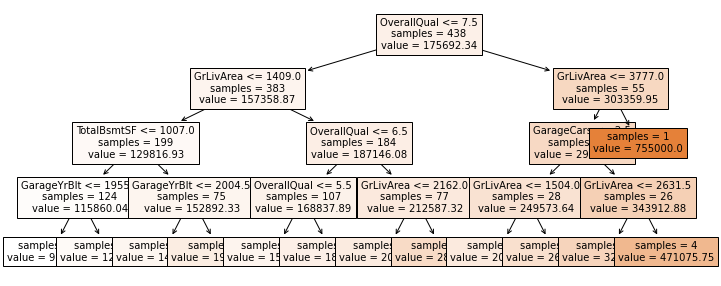

In [222]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 5))
plot = plot_tree(
            decision_tree = modelo,
            feature_names = dfFilter1.drop(columns = "SalePrice").columns,
            class_names   = 'SalePrice',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       );

plot

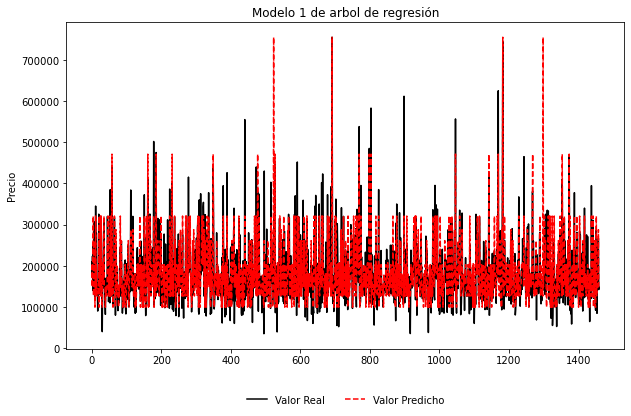

In [223]:
ytest_pred = modelo.predict(X)
plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(X))
plt.plot(x_ax,y,label='Valor Real',color='k',linestyle='-')
plt.plot(x_ax,ytest_pred,label='Valor Predicho',color='red',linestyle='--')
plt.title('Modelo 1 de arbol de regresión')
plt.ylabel('Precio')
plt.legend(bbox_to_anchor = (0.5,-0.2),loc = 'lower center',ncol = 2,frameon = False)
plt.show()

<p>Como se puede observar en el grafico, a veces el modelo falla por mucho, ya que hay picos rojos altos donde no deberia de haber.</p>

<p>Para evaluar la importancia de los predictores dentro de nuestro modelo, se realiza el siguiente dataframe y la funcion para realizar predicciones</p>

In [224]:
importancia_predictores = pd.DataFrame(
                            {'predictor': dfFilter1.drop(columns = "SalePrice").columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo


,predictor,importancia
5,OverallQual,0.559496
4,GrLivArea,0.331953
0,GarageCars,0.059503
3,TotalBsmtSF,0.031784
6,GarageYrBlt,0.017264
1,LotArea,0.000000
2,TotRmsAbvGrd,0.000000


In [225]:
predicciones = modelo.predict(X = X_train)

<p>Como se pude observar, para nuestro modelo el predictor mas importante para el precio es el año de contruccion de la vivienda.

Para el coeficiente de determinacion, el cual es el que determina la calidad de nuestro modelo en una escala de 0-1. Para calcularlo se importa la libreria r2_score.
</p>

In [226]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_pred = modelo.predict(X)
print("El error cuadrado medio para el modelo 1 es: ",sqrt(mean_squared_error(y,y_pred)))

El error cuadrado medio para el modelo 1 es:  43173.85131503983


In [227]:
dfFilter1["y_pred"]=y_pred
dfFilter1

C:\Users\jcarl\AppData\Local\Temp\ipykernel_23972\3066643090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFilter1["y_pred"]=y_pred


,GarageCars,LotArea,TotRmsAbvGrd,TotalBsmtSF,GrLivArea,OverallQual,GarageYrBlt,SalePrice,y_pred
0,2,8450,8,856,1710,7,2003.0,208500,202661.382353
1,2,9600,6,1262,1262,6,1976.0,181500,148654.779412
2,2,11250,6,920,1786,7,2001.0,223500,202661.382353
3,3,9550,7,756,1717,7,1998.0,140000,202661.382353
4,3,14260,9,1145,2198,8,2000.0,250000,320792.363636
...,...,...,...,...,...,...,...,...,...
1455,2,7917,7,953,1647,6,1999.0,175000,180309.864407
1456,2,13175,7,1542,2073,6,1978.0,210000,180309.864407
1457,1,9042,9,1152,2340,7,1941.0,266500,287583.333333
1458,1,9717,5,1078,1078,5,1950.0,142125,148654.779412


In [228]:
from sklearn.metrics import r2_score
print("el coeficiente de Determinación para el modelo 1 es: ",r2_score(y, y_pred))

el coeficiente de Determinación para el modelo 1 es:  0.7044484031535154


In [229]:
dfFilter1["y_pred"]=y_pred
dfFilter1

C:\Users\jcarl\AppData\Local\Temp\ipykernel_23972\3066643090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFilter1["y_pred"]=y_pred


,GarageCars,LotArea,TotRmsAbvGrd,TotalBsmtSF,GrLivArea,OverallQual,GarageYrBlt,SalePrice,y_pred
0,2,8450,8,856,1710,7,2003.0,208500,202661.382353
1,2,9600,6,1262,1262,6,1976.0,181500,148654.779412
2,2,11250,6,920,1786,7,2001.0,223500,202661.382353
3,3,9550,7,756,1717,7,1998.0,140000,202661.382353
4,3,14260,9,1145,2198,8,2000.0,250000,320792.363636
...,...,...,...,...,...,...,...,...,...
1455,2,7917,7,953,1647,6,1999.0,175000,180309.864407
1456,2,13175,7,1542,2073,6,1978.0,210000,180309.864407
1457,1,9042,9,1152,2340,7,1941.0,266500,287583.333333
1458,1,9717,5,1078,1078,5,1950.0,142125,148654.779412


<p>¿Que pasa si reducimos nuestras variables a las 3 principales predictores, ademas de modificar los parametros del arbol?</p>

In [230]:
dfFilter2 = dfTrain[["TotalBsmtSF","GrLivArea","OverallQual","SalePrice"]]
X2 = dfFilter2.iloc[:, :-1]
y2 = dfFilter2.iloc[:, -1]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=0)
tree2 = DecisionTreeRegressor(max_depth=10,criterion='friedman_mse')
modelo2 = tree2.fit(X_train2,y_train2)
y_pred2 = modelo2.predict(X2)

In [231]:

dfFilter1["y_pred2"]=y_pred2
dfFilter1

C:\Users\jcarl\AppData\Local\Temp\ipykernel_23972\3811874686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFilter1["y_pred2"]=y_pred2


,GarageCars,LotArea,TotRmsAbvGrd,TotalBsmtSF,GrLivArea,OverallQual,GarageYrBlt,SalePrice,y_pred,y_pred2
0,2,8450,8,856,1710,7,2003.0,208500,202661.382353,193700.000000
1,2,9600,6,1262,1262,6,1976.0,181500,148654.779412,177015.250000
2,2,11250,6,920,1786,7,2001.0,223500,202661.382353,228200.000000
3,3,9550,7,756,1717,7,1998.0,140000,202661.382353,140000.000000
4,3,14260,9,1145,2198,8,2000.0,250000,320792.363636,228500.000000
...,...,...,...,...,...,...,...,...,...,...
1455,2,7917,7,953,1647,6,1999.0,175000,180309.864407,156603.703704
1456,2,13175,7,1542,2073,6,1978.0,210000,180309.864407,210500.000000
1457,1,9042,9,1152,2340,7,1941.0,266500,287583.333333,265226.600000
1458,1,9717,5,1078,1078,5,1950.0,142125,148654.779412,144900.571429


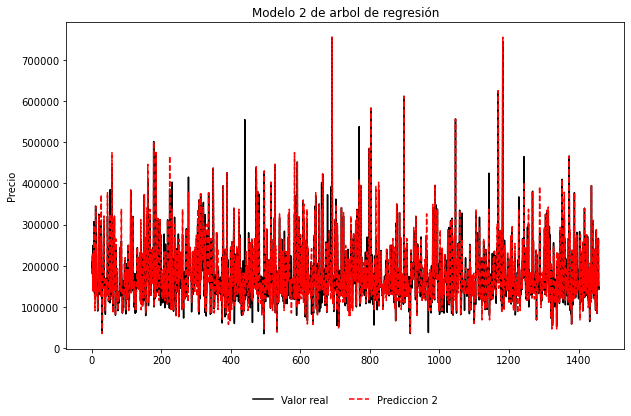

In [232]:
plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(X2))
plt.plot(x_ax,y2,label='Valor real',color='k',linestyle='-')
plt.plot(x_ax,y_pred2,label='Prediccion 2',color='red',linestyle='--')
plt.title('Modelo 2 de arbol de regresión')
plt.ylabel('Precio')
plt.legend(bbox_to_anchor = (0.5,-0.2),loc = 'lower center',ncol = 2,frameon = False)
plt.show()

In [233]:
print("El error cuadrado medio para el modelo 2 es: ",sqrt(mean_squared_error(y2, y_pred2)))
print("El coeficiente de Determinación para el modelo 2 es: ",r2_score(y2, y_pred2))

El error cuadrado medio para el modelo 2 es:  25143.783211124784
El coeficiente de Determinación para el modelo 2 es:  0.8997572495712529


<p>Como se puede observar, nuestro modelo mejora los resultados al utilizar menos variables y modificar algunos parametros como la profundidad del arbol</p>

<h2>Random Forest Regression</h2>

<p>Para esta practica, primero se tomaran los valores ya utilizados para la parte del arbol de regresión.

Primero tomaremos los valores para armar nuestro modelo.</p>

In [234]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(
            n_estimators = 100, #100 arboles de decision
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 0
         )
modelo3 = forest.fit(X_train, y_train)

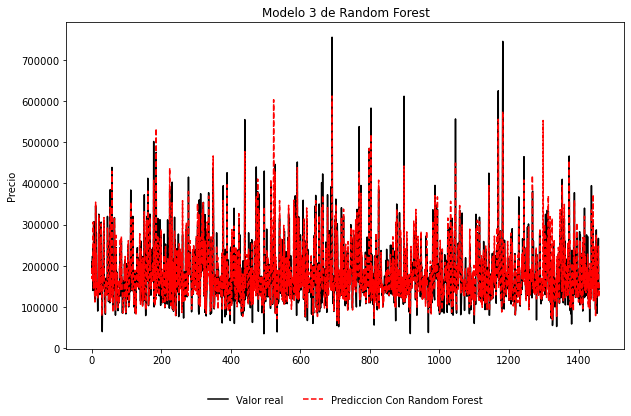

In [258]:
y_pred3 = modelo3.predict(X)

plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(X))
plt.plot(x_ax,y,label='Valor real',color='k',linestyle='-')
plt.plot(x_ax,y_pred3,label='Prediccion Con Random Forest',color='red',linestyle='--')
plt.title('Modelo 3 de Random Forest')
plt.ylabel('Precio')
plt.legend(bbox_to_anchor = (0.5,-0.2),loc = 'lower center',ncol = 2,frameon = False)
plt.show()

<p>Como se puede observar, los resultados son muy similares al primer grafico, salvo por unos cuantos detalles.
    Se procede a evaluar que tan bueno son estas predicciones. </p>

In [236]:
print("El error cuadrado medio para el modelo 1 de RF es: ",sqrt(mean_squared_error(y, y_pred3)))

El error cuadrado medio para el modelo 1 de RF es:  29713.091582697285


<p>Comparado con el primer valor obtenido, si se nota una leve mejora de reducción de error.</p>

In [241]:
print("El error coeficiente de determinación para el modelo 1 de RF es: ",r2_score(y, y_pred3))

El error coeficiente de determinación para el modelo 1 de RF es:  0.8600130954995602


</p>Como se observa, mejoran las metricas respecto al primer intento con varias variables y diferentes parametros, ahora se probara lo mismo pero con menos variables, como se realizo anteriormente</p> 

In [255]:
forest2 = RandomForestRegressor(
            n_estimators = 1000, #1000 arboles de decision
            criterion    = 'friedman_mse',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 0
         )
modelo4 = forest2.fit(X_train2, y_train2)

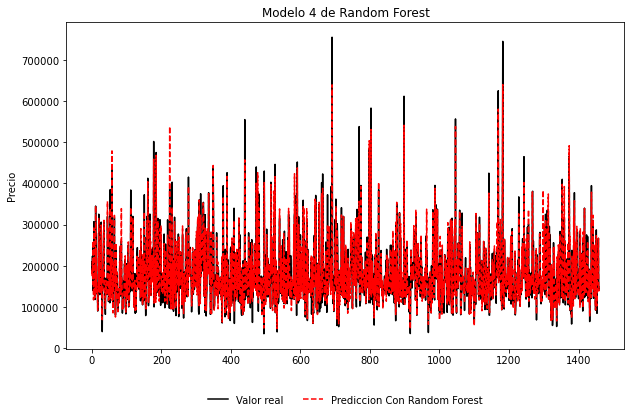

In [259]:
y_pred4 = modelo4.predict(X2)

plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(X))
plt.plot(x_ax,y,label='Valor real',color='k',linestyle='-')
plt.plot(x_ax,y_pred4,label='Prediccion Con Random Forest',color='red',linestyle='--')
plt.title('Modelo 4 de Random Forest')
plt.ylabel('Precio')
plt.legend(bbox_to_anchor = (0.5,-0.2),loc = 'lower center',ncol = 2,frameon = False)
plt.show()

In [261]:
print("El error cuadrado medio para el modelo 2 de RF es:",sqrt(mean_squared_error(y2, y_pred4)))
print("El coeficiente de Determinación para el modelo 2 de RF es:",r2_score(y2, y_pred4))

El error cuadrado medio para el modelo 2 de RF es: 21568.843290147262
El coeficiente de Determinación para el modelo 2 de RF es: 0.9262358338829325


<p>Por lo que para este analisis es mejor quedarse con el modelo 2 del arbol de random Forest.</p>